In [2]:
import mlrose_hiive
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score
import time
import matplotlib.pyplot as plt

Portion 1. 8 Queens Problem

RH vs SA vs GA vs MIMIC
Seems like SA have a edge.

In [29]:

    
from cmath import inf
# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):

   # Initialize counter
    fitness_cnt = 0

          # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):

                # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
            and (state[j] != state[i] + (j - i)) \
            and (state[j] != state[i] - (j - i)):

                   # If no attacks, then increment counter
                fitness_cnt += 1

    return fitness_cnt
# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)
problem = mlrose_hiive.DiscreteOpt(length = 16, fitness_fn = fitness_cust, maximize=True, max_val=16)
schedule = mlrose_hiive.ExpDecay()
#init_state = np.array([0, 2, 2, 3, 4, 5, 6, 7])
init_state = np.array([0, 2, 2, 3, 4, 5, 6, 7,0, 2, 2, 3, 4, 5, 6, 7])

rs_list = list(range(100))

In [31]:
###SA
success_time_SA = []
failed_time_SA =[]
fit_curve_arr_SA = np.zeros((10000,10000))
fittness_list = []
time_list = []
win_SA = 0

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
                                                      max_iters = 10000, init_state = init_state,
                                                      random_state = seed,curve=True)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]
    if best_fitness == 120:
        success_time_SA.append(time_buff)
        win_SA +=1
    else:
        failed_time_SA.append(time_buff)
    time_list.append(time_buff)
    fittness_list.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    if np.shape(fit_curve)[0]< 10000:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(10000-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_SA[seed,:] = fit_curve
print(win_SA)   


96


In [22]:
print(max(fittness_list))

28.0


In [23]:
###GA
success_time_GA = []
failed_time_GA =[]
fit_curve_arr_GA = np.zeros((100,100))
fittness_list = []
time_list = []
win_GA = 0

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.genetic_alg(problem,pop_size=300, max_attempts = 100,max_iters=100,random_state = seed,curve=True)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]
    if best_fitness == 28:
        success_time_GA.append(time_buff)
        win_GA +=1
    else:
        failed_time_GA.append(time_buff)
    time_list.append(time_buff)
    #print(best_fitness)
    fittness_list.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 100:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(100-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_GA[seed,:] = fit_curve
print(win_GA)


91


In [24]:
print(max(fittness_list))

28.0


In [25]:
###MIMIC
success_time_MIMIC = []
failed_time_MIMIC =[]
fit_curve_arr_MIMIC = np.zeros((100,100))
fittness_list = []
time_list = []
win_MIMIC = 0

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.mimic(problem,pop_size=300, max_attempts = 100, 
                                                      max_iters = 100,
                                                      random_state = seed,curve=True)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]
    if best_fitness == 28:
        success_time_MIMIC.append(time_buff)
        win_MIMIC +=1
    else:
        failed_time_MIMIC.append(time_buff)
    time_list.append(time_buff)
    fittness_list.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 100:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(100-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_MIMIC[seed,:] = fit_curve
print(win_MIMIC)

33


In [26]:
print(max(fittness_list))

28.0


In [33]:
###RHC 
success_time_RHC = []
failed_time_RHC =[]
fit_curve_arr_RHC = np.zeros((10000,10000))
fittness_list = []
time_list = []
win_RHC = 0

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.random_hill_climb(problem,max_attempts = 10000, 
                                                      max_iters = 10000,
                                                      random_state = seed,curve=True)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]
    if best_fitness == 120:
        success_time_RHC.append(time_buff)
        win_RHC +=1
    else:
        failed_time_RHC.append(time_buff)
    time_list.append(time_buff)
    fittness_list.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 10000:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(10000-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_RHC[seed,:] = fit_curve
print(win_RHC)

3


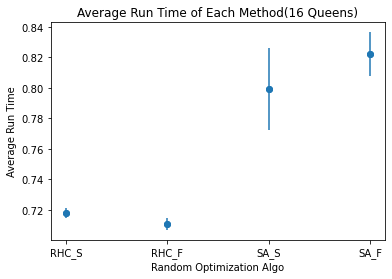

In [35]:
#plt.scatter([0,1,2,3,4,5,6,7],[success_time_RHC,failed_time_RHC,success_time_SA,failed_time_SA,success_time_GA,failed_time_GA,success_time_MIMIC,failed_time_MIMIC])
time_list = [np.mean(success_time_RHC),np.mean(failed_time_RHC),np.mean(success_time_SA),np.mean(failed_time_SA)]
time_list_error = [np.std(success_time_RHC),np.std(failed_time_RHC),np.std(success_time_SA),np.std(failed_time_SA)]
time_label_list=['RHC_S','RHC_F','SA_S','SA_F']
plt.scatter([0,1,2,3],time_list)
plt.errorbar([0,1,2,3],time_list,yerr=time_list_error,fmt="o")
#print(time_list)
plt.xticks([0,1,2,3],time_label_list)
#plt.yscale('log')
plt.ylabel('Average Run Time')
plt.xlabel('Random Optimization Algo')
plt.title('Average Run Time of Each Method(16 Queens)')
plt.savefig('Figure_5.png')

In [ ]:
print(max(fittness_list))

28.0


In [28]:
print([win_RHC,win_SA,win_GA,win_MIMIC])

[8, 1, 91, 33]


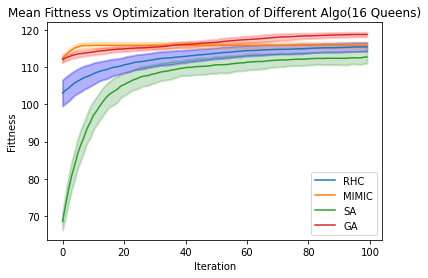

In [10]:
fit_curve_mean_MIMIC = np.mean(fit_curve_arr_MIMIC,axis=0)
fit_curve_std_MIMIC = np.std(fit_curve_arr_MIMIC,axis=0)
fit_curve_mean_GA = np.mean(fit_curve_arr_GA,axis=0)
fit_curve_std_GA = np.std(fit_curve_arr_GA,axis=0)
fit_curve_mean_SA = np.mean(fit_curve_arr_SA,axis=0)
fit_curve_std_SA = np.std(fit_curve_arr_SA,axis=0)
fit_curve_mean_RHC = np.mean(fit_curve_arr_RHC,axis=0)
fit_curve_std_RHC = np.std(fit_curve_arr_RHC,axis=0)
plt.plot(fit_curve_mean_RHC,label='RHC')
plt.plot(fit_curve_mean_MIMIC,label='MIMIC')

plt.fill_between(
    range(100),
    fit_curve_mean_RHC - fit_curve_std_RHC,
    fit_curve_mean_RHC+ fit_curve_std_RHC,
    alpha=0.3,
    color="b",
    lw=2,
)

plt.fill_between(
    range(100),
    fit_curve_mean_MIMIC - fit_curve_std_MIMIC,
    fit_curve_mean_MIMIC+ fit_curve_std_MIMIC,
    alpha=0.2,
    color="darkorange",
    lw=2,
)

plt.plot(fit_curve_mean_SA,label='SA')

plt.fill_between(
    range(100),
    fit_curve_mean_SA - fit_curve_std_SA,
    fit_curve_mean_SA+ fit_curve_std_SA,
    alpha=0.2,
    color="green",
    lw=2,
)

plt.plot(fit_curve_mean_GA,label='GA')

plt.fill_between(
    range(100),
    fit_curve_mean_GA - fit_curve_std_GA,
    fit_curve_mean_GA+ fit_curve_std_GA,
    alpha=0.2,
    color="red",
    lw=2,
)

plt.legend()
plt.title('Mean Fittness vs Optimization Iteration of Different Algo(16 Queens)')
plt.xlabel('Iteration')
#plt.yscale('log')
plt.ylabel('Fittness')
plt.savefig('Figure_4.png')

[0, 0, 12, 0]


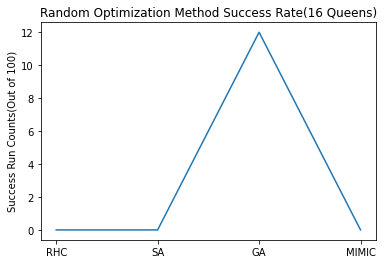

In [14]:
plt.plot([0,1,2,3],[win_RHC,win_SA,win_GA,win_MIMIC])
plt.xticks([0,1,2,3],['RHC','SA','GA','MIMIC'])
plt.ylabel('Success Run Counts(Out of 100)')
plt.title('Random Optimization Method Success Rate(16 Queens)')
plt.savefig('Figure_5.png')
print([win_RHC,win_SA,win_GA,win_MIMIC])

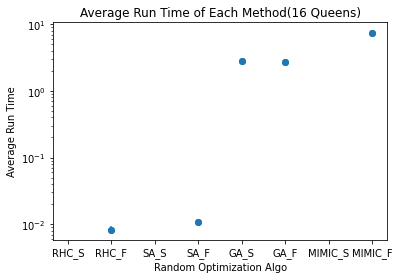

In [13]:
#plt.scatter([0,1,2,3,4,5,6,7],[success_time_RHC,failed_time_RHC,success_time_SA,failed_time_SA,success_time_GA,failed_time_GA,success_time_MIMIC,failed_time_MIMIC])
time_list = [np.mean(success_time_RHC),np.mean(failed_time_RHC),np.mean(success_time_SA),np.mean(failed_time_SA),np.mean(success_time_GA),np.mean(failed_time_GA),np.mean(success_time_MIMIC),np.mean(failed_time_MIMIC)]
time_list_error = [np.std(success_time_RHC),np.std(failed_time_RHC),np.std(success_time_SA),np.std(failed_time_SA),np.std(success_time_GA),np.std(failed_time_GA),np.std(success_time_MIMIC),np.std(failed_time_MIMIC)]
time_label_list=['RHC_S','RHC_F','SA_S','SA_F','GA_S','GA_F','MIMIC_S','MIMIC_F']
plt.scatter([0,1,2,3,4,5,6,7],time_list)
plt.errorbar([0,1,2,3,4,5,6,7],time_list,yerr=time_list_error,fmt="o")
#print(time_list)
plt.xticks([0,1,2,3,4,5,6,7],time_label_list)
plt.yscale('log')
plt.ylabel('Average Run Time')
plt.xlabel('Random Optimization Algo')
plt.title('Average Run Time of Each Method(16 Queens)')
plt.savefig('Figure_6.png')

In [134]:
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

# Initialize fitness function object using coords_list
fitness_coords = mlrose_hiive.TravellingSales(coords = coords_list)
# Create list of distances between pairs of cities
dist_list = [(0, 1, 3.1623), (0, 2, 4.1231), (0, 3, 5.8310), (0, 4, 4.2426), \
             (0, 5, 5.3852), (0, 6, 4.0000), (0, 7, 2.2361), (1, 2, 1.0000), \
             (1, 3, 2.8284), (1, 4, 2.0000), (1, 5, 4.1231), (1, 6, 4.2426), \
             (1, 7, 2.2361), (2, 3, 2.2361), (2, 4, 2.2361), (2, 5, 4.4721), \
             (2, 6, 5.0000), (2, 7, 3.1623), (3, 4, 2.0000), (3, 5, 3.6056), \
             (3, 6, 5.0990), (3, 7, 4.1231), (4, 5, 2.2361), (4, 6, 3.1623), \
             (4, 7, 2.2361), (5, 6, 2.2361), (5, 7, 3.1623), (6, 7, 2.2361)]

# Initialize fitness function object using dist_list
fitness_dists = mlrose_hiive.TravellingSales(distances = dist_list)
# Define optimization problem object
problem_fit = mlrose_hiive.TSPOpt(length = 8, fitness_fn = fitness_coords, maximize=False)

In [135]:
###SA

fit_curve_arr_SA = np.zeros((100,100))
fittness_list_SA = []
time_list_SA = []
win_SA = 0

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.simulated_annealing(problem_fit, schedule = schedule, max_attempts = 10, 
                                                      max_iters = 100,
                                                      random_state = seed,curve=True,)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]
    time_list_SA.append(time_buff)
    fittness_list_SA.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    if np.shape(fit_curve)[0]< 100:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(100-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_SA[seed,:] = fit_curve


In [136]:
print(np.mean(fittness_list_SA))

19.541042276393394


In [137]:
###RHC 
success_time_RHC = []
failed_time_RHC =[]
fit_curve_arr_RHC = np.zeros((100,100))
fittness_list_RHC = []
time_list_RHC = []

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.random_hill_climb(problem_fit,max_attempts = 10, 
                                                      max_iters = 100,
                                                      random_state = seed,curve=True)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]
    time_list_RHC.append(time_buff)
    fittness_list_RHC.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 100:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(100-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_RHC[seed,:] = fit_curve

In [138]:
print(np.mean(fittness_list_RHC))

20.508754978968273


In [141]:
###GA
fit_curve_arr_GA = np.zeros((100,100))
fittness_list_GA = []
time_list_GA = []

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.genetic_alg(problem_fit,pop_size=200, max_attempts = 10,max_iters=100,random_state = seed,curve=True,)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]

    time_list_GA.append(time_buff)
    #print(best_fitness)
    fittness_list_GA.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 1000:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(100-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_GA[seed,:] = fit_curve


In [ ]:
print(np.mean(fittness_list_GA))

17.342617547667324


In [143]:
###MIMIC
fit_curve_arr_MIMIC = np.zeros((100,100))
fittness_list_MIMIC = []
time_list_MIMIC = []

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.mimic(problem_fit,pop_size=300, max_attempts = 10, 
                                                      max_iters = 100,
                                                      random_state = seed,curve=True)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]
    time_list_MIMIC.append(time_buff)
    fittness_list_MIMIC.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 100:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(100-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_MIMIC[seed,:] = fit_curve


In [157]:
print( np.std(fit_curve_arr_MIMIC,axis=0)[99])
print( np.std(fit_curve_arr_GA,axis=0)[99])

0.2818384071715449
1.7763568394002505e-14


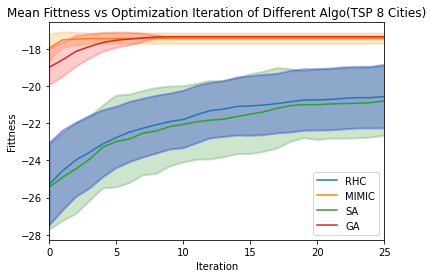

In [160]:
fit_curve_mean_MIMIC = np.mean(fit_curve_arr_MIMIC,axis=0)
fit_curve_std_MIMIC = np.std(fit_curve_arr_MIMIC,axis=0)
fit_curve_mean_GA = np.mean(fit_curve_arr_GA,axis=0)
fit_curve_std_GA = np.std(fit_curve_arr_GA,axis=0)
fit_curve_mean_SA = np.mean(fit_curve_arr_SA,axis=0)
fit_curve_std_SA = np.std(fit_curve_arr_SA,axis=0)
fit_curve_mean_RHC = np.mean(fit_curve_arr_RHC,axis=0)
fit_curve_std_RHC = np.std(fit_curve_arr_RHC,axis=0)
plt.plot(-1*fit_curve_mean_RHC,label='RHC')
plt.plot(-1*fit_curve_mean_MIMIC,label='MIMIC')

plt.fill_between(
    range(100),
    -1*(fit_curve_mean_RHC - fit_curve_std_RHC),
    -1*(fit_curve_mean_RHC+ fit_curve_std_RHC),
    alpha=0.3,
    color="b",
    lw=2,
)

plt.fill_between(
    range(100),
    -1*(fit_curve_mean_MIMIC - fit_curve_std_MIMIC),
    -1*(fit_curve_mean_MIMIC+ fit_curve_std_MIMIC),
    alpha=0.2,
    color="darkorange",
    lw=2,
)

plt.plot(-1*fit_curve_mean_SA,label='SA')

plt.fill_between(
    range(100),
    -1*(fit_curve_mean_SA - fit_curve_std_SA),
    -1*(fit_curve_mean_SA+ fit_curve_std_SA),
    alpha=0.2,
    color="green",
    lw=2,
)

plt.plot(-1*fit_curve_mean_GA,label='GA')

plt.fill_between(
    range(100),
    -1*(fit_curve_mean_GA - fit_curve_std_GA),
    -1*(fit_curve_mean_GA+ fit_curve_std_GA),
    alpha=0.2,
    color="red",
    lw=2,
)

plt.legend()
plt.title('Mean Fittness vs Optimization Iteration of Different Algo(TSP 8 Cities)')
plt.xlabel('Iteration')
plt.xlim(0,25)
plt.ylabel('Fittness')
plt.savefig('Figure_6.png')

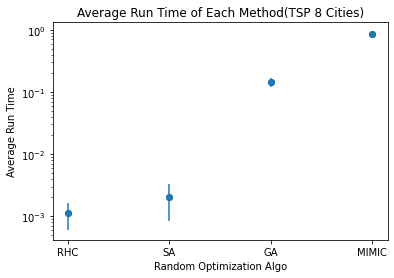

In [161]:
#plt.scatter([0,1,2,3,4,5,6,7],[success_time_RHC,failed_time_RHC,success_time_SA,failed_time_SA,success_time_GA,failed_time_GA,success_time_MIMIC,failed_time_MIMIC])
time_list = [np.mean(time_list_RHC),np.mean(time_list_SA),np.mean(time_list_GA),np.mean(time_list_MIMIC)]
time_list_error = [np.std(time_list_RHC),np.std(time_list_SA),np.std(time_list_GA),np.std(time_list_MIMIC)]

time_label_list=['RHC','SA','GA','MIMIC']
plt.scatter([0,1,2,3],time_list)
plt.errorbar([0,1,2,3],time_list,yerr=time_list_error,fmt="o")
#print(time_list)
plt.xticks([0,1,2,3],time_label_list)
plt.yscale('log')
plt.ylabel('Average Run Time')
plt.xlabel('Random Optimization Algo')
plt.title('Average Run Time of Each Method(TSP 8 Cities)')
plt.savefig('Figure_7.png')

In [170]:
###GA
fit_curve_arr_GA = np.zeros((100,100))
fittness_list_GA = []
time_list_GA = []

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.genetic_alg(problem_fit,pop_size=100, max_attempts = 10,max_iters=100,random_state = seed,curve=True,)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]

    time_list_GA.append(time_buff)
    #print(best_fitness)
    fittness_list_GA.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 100:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(100-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_GA[seed,:] = fit_curve

fittness_list_GA_100 = fit_curve_arr_GA
time_list_GA_100 = time_list_GA


In [171]:
###GA
fit_curve_arr_GA = np.zeros((100,100))
fittness_list_GA = []
time_list_GA = []

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.genetic_alg(problem_fit,pop_size=200, max_attempts = 10,max_iters=100,random_state = seed,curve=True,)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]

    time_list_GA.append(time_buff)
    #print(best_fitness)
    fittness_list_GA.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 100:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(100-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_GA[seed,:] = fit_curve


fittness_list_GA_200 = fit_curve_arr_GA
time_list_GA_200 = time_list_GA

In [172]:
###GA
fit_curve_arr_GA = np.zeros((100,100))
fittness_list_GA = []
time_list_GA = []

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.genetic_alg(problem_fit,pop_size=300, max_attempts = 10,max_iters=100,random_state = seed,curve=True,)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]

    time_list_GA.append(time_buff)
    #print(best_fitness)
    fittness_list_GA.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 100:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(100-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_GA[seed,:] = fit_curve


fittness_list_GA_300 = fit_curve_arr_GA
time_list_GA_300 = time_list_GA

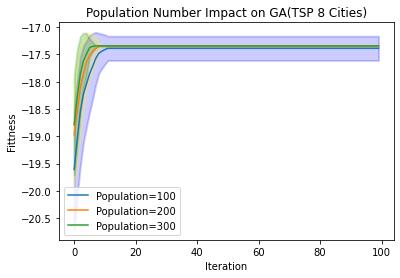

In [177]:
fittness_mean_100 = np.mean(fittness_list_GA_100,axis=0)
fittness_mean_200 = np.mean(fittness_list_GA_200,axis=0)
fittness_mean_300 = np.mean(fittness_list_GA_300,axis=0)
fittness_std_100 = np.std(fittness_list_GA_100,axis=0)
fittness_std_200 = np.std(fittness_list_GA_200,axis=0)
fittness_std_300 = np.std(fittness_list_GA_300,axis=0)


plt.plot(-1*fittness_mean_100,label='Population=100')
plt.plot(-1*fittness_mean_200,label='Population=200')
plt.plot(-1*fittness_mean_300,label='Population=300')


plt.fill_between(
    range(100),
    -1*(fittness_mean_100 - fittness_std_100),
    -1*(fittness_mean_100+ fittness_std_100),
    alpha=0.2,
    color="blue",
    lw=2,
)
plt.fill_between(
    range(100),
    -1*(fittness_mean_200 - fittness_std_200),
    -1*(fittness_mean_200+ fittness_std_200),
    alpha=0.2,
    color="yellow",
    lw=2,
)
plt.fill_between(
    range(100),
    -1*(fittness_mean_300 - fittness_std_300),
    -1*(fittness_mean_300+ fittness_std_300),
    alpha=0.2,
    color="green",
    lw=2,
)

plt.legend()
plt.title('Population Number Impact on GA(TSP 8 Cities)')
plt.xlabel('Iteration')
#plt.xlim(0,25)
plt.ylabel('Fittness')
plt.savefig('Figure_8.png')

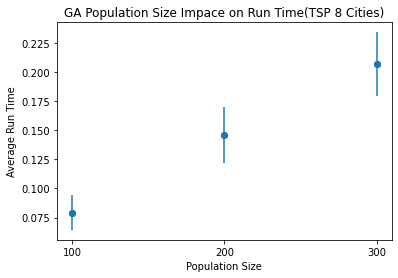

In [180]:
#plt.scatter([0,1,2,3,4,5,6,7],[success_time_RHC,failed_time_RHC,success_time_SA,failed_time_SA,success_time_GA,failed_time_GA,success_time_MIMIC,failed_time_MIMIC])
time_list = [np.mean(time_list_GA_100),np.mean(time_list_GA_200),np.mean(time_list_GA_300)]
time_list_error = [np.std(time_list_GA_100),np.std(time_list_GA_200),np.std(time_list_GA_300)]


time_label_list=['100','200','300']
plt.scatter([0,1,2],time_list)
plt.errorbar([0,1,2],time_list,yerr=time_list_error,fmt="o")
#print(time_list)
plt.xticks([0,1,2],time_label_list)
#plt.yscale('log')
plt.ylabel('Average Run Time')
plt.xlabel('Population Size')
plt.title('GA Population Size Impace on Run Time(TSP 8 Cities)')
plt.savefig('Figure_9.png')

In [189]:
###GA
fit_curve_arr_GA = np.zeros((100,100))
fittness_list_GA = []
time_list_GA = []

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.genetic_alg(problem_fit,pop_size=200, max_attempts = 10,max_iters=100,random_state = seed,curve=True,mutation_prob=0.1)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]

    time_list_GA.append(time_buff)
    #print(best_fitness)
    fittness_list_GA.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 100:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(100-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_GA[seed,:] = fit_curve

fittness_list_GA_001 = fit_curve_arr_GA
time_list_GA_001 = time_list_GA

In [181]:
###GA
fit_curve_arr_GA = np.zeros((100,100))
fittness_list_GA = []
time_list_GA = []

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.genetic_alg(problem_fit,pop_size=200, max_attempts = 10,max_iters=100,random_state = seed,curve=True,mutation_prob=0.1)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]

    time_list_GA.append(time_buff)
    #print(best_fitness)
    fittness_list_GA.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 100:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(100-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_GA[seed,:] = fit_curve

fittness_list_GA_01 = fit_curve_arr_GA
time_list_GA_01 = time_list_GA

In [182]:
###GA
fit_curve_arr_GA = np.zeros((100,100))
fittness_list_GA = []
time_list_GA = []

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.genetic_alg(problem_fit,pop_size=200, max_attempts = 10,max_iters=100,random_state = seed,curve=True,mutation_prob=0.2)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]

    time_list_GA.append(time_buff)
    #print(best_fitness)
    fittness_list_GA.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 100:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(100-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_GA[seed,:] = fit_curve

fittness_list_GA_02 = fit_curve_arr_GA
time_list_GA_02 = time_list_GA

In [183]:
###GA
fit_curve_arr_GA = np.zeros((100,100))
fittness_list_GA = []
time_list_GA = []

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.genetic_alg(problem_fit,pop_size=200, max_attempts = 10,max_iters=100,random_state = seed,curve=True,mutation_prob=0.3)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]

    time_list_GA.append(time_buff)
    #print(best_fitness)
    fittness_list_GA.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 100:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(100-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_GA[seed,:] = fit_curve

fittness_list_GA_03 = fit_curve_arr_GA
time_list_GA_03 = time_list_GA

In [184]:
###GA
fit_curve_arr_GA = np.zeros((100,100))
fittness_list_GA = []
time_list_GA = []

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.genetic_alg(problem_fit,pop_size=200, max_attempts = 10,max_iters=100,random_state = seed,curve=True,mutation_prob=0.4)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]

    time_list_GA.append(time_buff)
    #print(best_fitness)
    fittness_list_GA.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 100:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(100-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_GA[seed,:] = fit_curve

fittness_list_GA_04 = fit_curve_arr_GA
time_list_GA_04 = time_list_GA

In [185]:
###GA
fit_curve_arr_GA = np.zeros((100,100))
fittness_list_GA = []
time_list_GA = []

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.genetic_alg(problem_fit,pop_size=200, max_attempts = 10,max_iters=100,random_state = seed,curve=True,mutation_prob=0.5)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]

    time_list_GA.append(time_buff)
    #print(best_fitness)
    fittness_list_GA.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 100:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(100-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_GA[seed,:] = fit_curve

fittness_list_GA_05 = fit_curve_arr_GA
time_list_GA_05 = time_list_GA

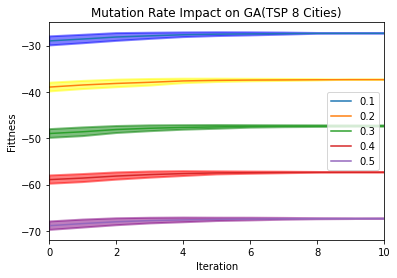

In [202]:
fittness_mean_1 = np.mean(fittness_list_GA_01,axis=0)
fittness_mean_2 = np.mean(fittness_list_GA_02,axis=0)
fittness_mean_3 = np.mean(fittness_list_GA_03,axis=0)
fittness_mean_4 = np.mean(fittness_list_GA_04,axis=0)
fittness_mean_5 = np.mean(fittness_list_GA_05,axis=0)
#fittness_mean_01 = np.mean(fittness_list_GA_001,axis=0)
#fittness_std_01 = np.std(fittness_list_GA_001,axis=0)

fittness_std_1 = np.std(fittness_list_GA_01,axis=0)
fittness_std_2 = np.std(fittness_list_GA_02,axis=0)
fittness_std_3 = np.std(fittness_list_GA_03,axis=0)
fittness_std_4 = np.std(fittness_list_GA_04,axis=0)
fittness_std_5 = np.std(fittness_list_GA_05,axis=0)


plt.plot(-1*fittness_mean_1-10,label='0.1')
plt.plot(-1*fittness_mean_2-20,label='0.2')
plt.plot(-1*fittness_mean_3-30,label='0.3')
plt.plot(-1*fittness_mean_4-40,label='0.4')
plt.plot(-1*fittness_mean_5-50,label='0.5')
plt.fill_between(
    range(100),
    -1*(fittness_mean_1 - fittness_std_1)-10,
    -1*(fittness_mean_1+ fittness_std_1)-10,
    alpha=0.5,
    color="blue",
    lw=2,
)
plt.fill_between(
    range(100),
    -1*(fittness_mean_2 - fittness_std_2)-20,
    -1*(fittness_mean_2+ fittness_std_2)-20,
    alpha=0.5,
    color="yellow",
    lw=2,
)
plt.fill_between(
    range(100),
    -1*(fittness_mean_3 - fittness_std_3)-30,
    -1*(fittness_mean_3+ fittness_std_3)-30,
    alpha=0.5,
    color="green",
    lw=2,
)

plt.fill_between(
    range(100),
    -1*(fittness_mean_4 - fittness_std_4)-40,
    -1*(fittness_mean_4+ fittness_std_4)-40,
    alpha=0.5,
    color="red",
    lw=2,
)
plt.fill_between(
    range(100),
    -1*(fittness_mean_5 - fittness_std_5)-50,
    -1*(fittness_mean_5+ fittness_std_5)-50,
    alpha=0.5,
    color="purple",
    lw=2,
)

plt.legend()
plt.title('Mutation Rate Impact on GA(TSP 8 Cities)')
plt.xlabel('Iteration')
plt.xlim(0,10)
plt.ylabel('Fittness')
plt.savefig('Figure_10.png')

In [205]:
print(fittness_std_5[-1])
print(fittness_std_4[-1])
print(fittness_std_3[-1])
print(fittness_std_2[-1])
print(fittness_std_1[-1])

print(fittness_mean_5[-1])
print(fittness_mean_4[-1])
print(fittness_mean_3[-1])
print(fittness_mean_2[-1])
print(fittness_mean_1[-1])


1.7763568394002505e-14
1.7763568394002505e-14
1.7763568394002505e-14
1.7763568394002505e-14
1.7763568394002505e-14
17.342617547667313
17.342617547667313
17.342617547667313
17.342617547667313
17.342617547667313


Text(0.5, 1.0, 'GA Population Size Impace on Run Time(TSP 8 Cities)')

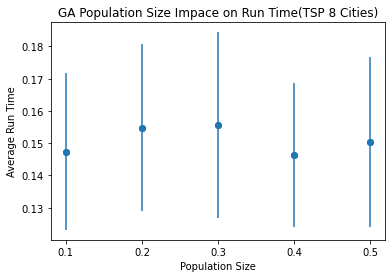

In [192]:
#plt.scatter([0,1,2,3,4,5,6,7],[success_time_RHC,failed_time_RHC,success_time_SA,failed_time_SA,success_time_GA,failed_time_GA,success_time_MIMIC,failed_time_MIMIC])
time_list = [np.mean(time_list_GA_01),np.mean(time_list_GA_02),np.mean(time_list_GA_03),np.mean(time_list_GA_04),np.mean(time_list_GA_05)]
time_list_error = [np.std(time_list_GA_01),np.std(time_list_GA_02),np.std(time_list_GA_03),np.std(time_list_GA_04),np.std(time_list_GA_05)]



time_label_list=['0.1','0.2','0.3','0.4','0.5']
plt.scatter([0,1,2,3,4],time_list)
plt.errorbar([0,1,2,3,4],time_list,yerr=time_list_error,fmt="o")
#print(time_list)
plt.xticks([0,1,2,3,4],time_label_list)
#plt.yscale('log')
plt.ylabel('Average Run Time')
plt.xlabel('Population Size')
plt.title('GA Population Size Impace on Run Time(TSP 8 Cities)')
#plt.savefig('Figure_9.png')

max k color MIMIC

In [212]:
##

import numpy as np
edges = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
fitness = mlrose_hiive.MaxKColor(edges)
state = np.array([0, 1, 0, 1, 1])
fitness.evaluate(state)
problem_k = mlrose_hiive.DiscreteOpt(length = 5, fitness_fn = fitness, maximize=True, max_val=5)
schedule = mlrose_hiive.ExpDecay()

In [246]:
fit_curve_arr_MIMIC = np.zeros((100,3))
fittness_list_MIMIC = []
time_list_MIMIC = []

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.mimic(problem_k,pop_size=100, max_attempts = 5, 
                                                      max_iters = 3,
                                                      random_state = seed,curve=True)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]
    time_list_MIMIC.append(time_buff)
    fittness_list_MIMIC.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 3:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(3-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_MIMIC[seed,:] = fit_curve

In [258]:
###GA
fit_curve_arr_GA = np.zeros((100,3))
fittness_list_GA = []
time_list_GA = []

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.genetic_alg(problem_k,pop_size=100, max_attempts = 5,max_iters=3,random_state = seed,curve=True)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]

    time_list_GA.append(time_buff)
    #print(best_fitness)
    fittness_list_GA.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 3:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(3-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_GA[seed,:] = fit_curve


In [253]:
print(np.max(fittness_list_GA))

6.0


In [248]:
###SA

fit_curve_arr_SA = np.zeros((100,3))
fittness_list_SA = []
time_list_SA = []
win_SA = 0

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.simulated_annealing(problem_k, schedule = schedule, max_attempts = 5, 
                                                      max_iters = 3,
                                                      random_state = seed,curve=True,)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]
    time_list_SA.append(time_buff)
    fittness_list_SA.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    if np.shape(fit_curve)[0]< 5:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(3-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_SA[seed,:] = fit_curve

In [249]:
###RHC 
fit_curve_arr_RHC = np.zeros((100,3))
fittness_list_RHC = []
time_list_RHC = []

for seed in rs_list:

    start_time = time.time()
    best = mlrose_hiive.random_hill_climb(problem_k,max_attempts = 5, 
                                                      max_iters = 3,
                                                      random_state = seed,curve=True)
    time_buff =time.time() - start_time
    
    best_state, best_fitness = best[0],best[1]
    time_list_RHC.append(time_buff)
    fittness_list_RHC.append(best_fitness)
    fit_curve = np.asarray(best[2][:,0]).flatten()
    #print(np.shape(fit_curve)[0])
    if np.shape(fit_curve)[0]< 3:
        #print(np.shape(fit_curve)[0])
        ###add some element to the array to make it size 4000
        dummy= np.asarray([best[2][:,0][-1]]*(3-len(best[2][:,0])))
        #print(np.shape(dummy))
        #print(np.shape(fit_curve))
        fit_curve = np.concatenate((fit_curve,dummy),axis=0)

    fit_curve_arr_RHC[seed,:] = fit_curve

In [256]:
print(np.mean(fit_curve_arr_MIMIC,axis=0))
print(np.std(fit_curve_arr_MIMIC,axis=0))

[5.55 5.94 5.96]
[0.85293611 0.34117444 0.28      ]


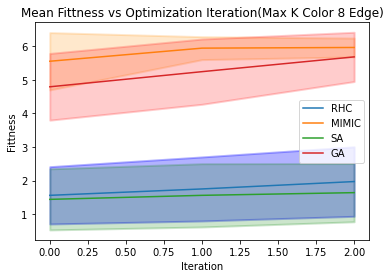

In [393]:
fit_curve_mean_MIMIC = np.mean(fit_curve_arr_MIMIC,axis=0)
fit_curve_std_MIMIC = np.std(fit_curve_arr_MIMIC,axis=0)
fit_curve_mean_GA = np.mean(fit_curve_arr_GA,axis=0)
fit_curve_std_GA = np.std(fit_curve_arr_GA,axis=0)
fit_curve_mean_SA = np.mean(fit_curve_arr_SA,axis=0)
fit_curve_std_SA = np.std(fit_curve_arr_SA,axis=0)
fit_curve_mean_RHC = np.mean(fit_curve_arr_RHC,axis=0)
fit_curve_std_RHC = np.std(fit_curve_arr_RHC,axis=0)
plt.plot(fit_curve_mean_RHC,label='RHC')
plt.plot(fit_curve_mean_MIMIC,label='MIMIC')

plt.fill_between(
    range(3),
    (fit_curve_mean_RHC - fit_curve_std_RHC),
    (fit_curve_mean_RHC+ fit_curve_std_RHC),
    alpha=0.3,
    color="b",
    lw=2,
)

plt.fill_between(
    range(3),
    (fit_curve_mean_MIMIC - fit_curve_std_MIMIC),
    (fit_curve_mean_MIMIC+ fit_curve_std_MIMIC),
    alpha=0.2,
    color="darkorange",
    lw=2,
)

plt.plot(fit_curve_mean_SA,label='SA')

plt.fill_between(
    range(3),
    (fit_curve_mean_SA - fit_curve_std_SA),
    (fit_curve_mean_SA+ fit_curve_std_SA),
    alpha=0.2,
    color="green",
    lw=2,
)

plt.plot(fit_curve_mean_GA,label='GA')

plt.fill_between(
    range(3),
    (fit_curve_mean_GA - fit_curve_std_GA),
    (fit_curve_mean_GA+ fit_curve_std_GA),
    alpha=0.2,
    color="red",
    lw=2,
)

plt.legend()
plt.title('Mean Fittness vs Optimization Iteration(Max K Color 8 Edge)')
plt.xlabel('Iteration')
plt.ylabel('Fittness')
plt.savefig('Figure_10.png')

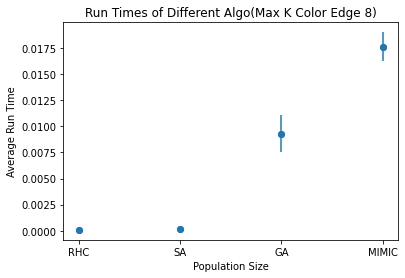

In [263]:
#plt.scatter([0,1,2,3,4,5,6,7],[success_time_RHC,failed_time_RHC,success_time_SA,failed_time_SA,success_time_GA,failed_time_GA,success_time_MIMIC,failed_time_MIMIC])
time_list = [np.mean(time_list_RHC),np.mean(time_list_SA),np.mean(time_list_GA),np.mean(time_list_MIMIC)]
time_list_error = [np.std(time_list_RHC),np.std(time_list_SA),np.std(time_list_GA),np.std(time_list_MIMIC)]



time_label_list=['RHC','SA','GA','MIMIC']
plt.scatter([0,1,2,3],time_list)
plt.errorbar([0,1,2,3],time_list,yerr=time_list_error,fmt="o")
#print(time_list)
plt.xticks([0,1,2,3],time_label_list)
#plt.yscale('log')
plt.ylabel('Average Run Time')
plt.xlabel('Population Size')
plt.title('Run Times of Different Algo(Max K Color Edge 8)')
plt.savefig('Figure_11.png')

Section II  NN

Using the adult Dataset

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler, OneHotEncoder
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score, make_scorer
data_1=pd.read_csv('adult.data', header=None, names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','50K'], sep=',\s', na_values=["?"])
data_2=pd.read_csv('adult.test', header=None, names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','50K'], sep=',\s', na_values=["?"])

adult_df = pd.concat([data_1,data_2])

###clean all missing data, just delect all of those 
adult_df.replace(' ?',np.NaN,inplace=True)
adult_df=adult_df.dropna()
adult_df.replace('>50K.', '>',inplace=True)
adult_df.replace('<=50K.', '<=',inplace=True)
adult_df.replace('>50K', '>',inplace=True)
adult_df.replace('<=50K', '<=',inplace=True)
##normalize

adult_label_col =['workclass','education','marital-status','occupation','relationship','race','sex','native-country','50K']
adult_df[adult_label_col] = adult_df[adult_label_col].astype('category')
adult_df[adult_label_col] = adult_df[adult_label_col].apply(lambda x: x.cat.codes)


scaler = MinMaxScaler()
#num_label = ['age','education-num','capital-gain','capital-loss','hours-per-week']
all_label =list(adult_df)
all_label.remove('50K')
adult_df[all_label] = scaler.fit_transform(adult_df[all_label])
#print(adult_df['hours-per-week'].std())
X_adult, y_adult = adult_df.loc[:, adult_df.columns != '50K'],adult_df['50K']

X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult, y_adult, test_size=0.2, random_state=33)
one_hot = OneHotEncoder()
y_train_hot = one_hot.fit_transform(np.asarray(y_train_adult).reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(np.asarray(y_test_adult).reshape(-1, 1)).todense()

In [21]:
# RHC
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 10000, \
                                 bias = True, is_classifier = True, learning_rate = 0.5, \
                                 early_stopping = True, clip_max = 5, max_attempts = 10000, \
                                 random_state = 3,curve=True)
start_time = time.time()
nn_model1.fit(X_train_adult, y_train_hot)
RHC_time =time.time() - start_time

In [471]:
l_rate_list = [0.75,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
rhc_f_curve_list = []
rhc_time_list = []
for rate in l_rate_list:

    rhc_nn_model= mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 2000, \
                                 bias = True, is_classifier = True, learning_rate = rate, \
                                 early_stopping = True, clip_max = 5, max_attempts = 1000, \
                                 random_state = 3,curve=True)
    start_time = time.time()
    rhc_nn_model.fit(X_train_adult, y_train_hot) 
    time_buff =time.time() - start_time

    rhc_f_curve = rhc_nn_model.fitness_curve
    rhc_time_list.append(time_buff)
    rhc_f_curve_list.append(rhc_f_curve)


KeyboardInterrupt: 

In [409]:
print(rhc_f_curve)

[[1.44769321e+00 1.00000000e+00]
 [1.44765986e+00 3.00000000e+00]
 [1.44765986e+00 5.00000000e+00]
 ...
 [1.43706120e+00 2.85200000e+03]
 [1.43706120e+00 2.85300000e+03]
 [1.43706115e+00 2.85500000e+03]]


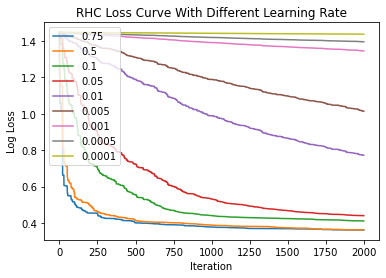

In [453]:
for i in range(len(l_rate_list)):
    plt.plot(rhc_f_curve_list[i][:,0],label=str(l_rate_list[i]))
plt.legend(loc=2)
plt.title('RHC Loss Curve With Different Learning Rate')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.savefig('Figure_12.png')

In [405]:
print(f1_score(y_train_hot,nn_model1.predict(X_train_adult),average='weighted'))
print(f1_score(y_test_hot,nn_model1.predict(X_test_adult),average='weighted'))


0.7830672399273529
0.7823788064269787


In [24]:
# SA
schedule = mlrose_hiive.ExpDecay()
nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 10000, \
                                 bias = True, is_classifier = True, learning_rate = 0.5, \
                                 early_stopping = True, clip_max = 5, max_attempts = 10000, \
                                 random_state = 3,schedule=schedule,curve=True)

start_time = time.time()
nn_model2.fit(X_train_adult, y_train_hot)
SA_time =time.time() - start_time

In [426]:
l_rate_list = [0.75,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
sa_f_curve_list = []
sa_time_list=[]
for rate in l_rate_list:
    sa_nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 10000, \
                                 bias = True, is_classifier = True, learning_rate = rate, \
                                 early_stopping = True, clip_max = 5, max_attempts = 1000, \
                                 random_state = 3,schedule=schedule,curve=True)
     
    start_time = time.time()
    sa_nn_model.fit(X_train_adult, y_train_hot) 
    time_buff =time.time() - start_time

    sa_f_curve = sa_nn_model.fitness_curve
    sa_time_list.append(time_buff)
    sa_f_curve_list.append(sa_f_curve)


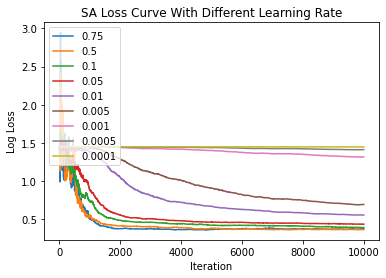

In [454]:
for i in range(len(l_rate_list)):
    plt.plot(sa_f_curve_list[i][:,0],label=str(l_rate_list[i]))
plt.legend(loc=2)
plt.legend(loc=2)
plt.title('SA Loss Curve With Different Learning Rate')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.savefig('Figure_13.png')

In [394]:
print(f1_score(y_train_hot,nn_model2.predict(X_train_adult),average='weighted'))
print(f1_score(y_test_hot,nn_model2.predict(X_test_adult),average='weighted'))


0.8227124303852701
0.8241212295548487


In [19]:
# GA
nn_model3 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = 10000, \
                                 bias = True, is_classifier = True, \
                                 early_stopping = True, clip_max = 5, max_attempts = 10, \
                                 random_state = 3,pop_size=1000,curve=True)
    
start_time = time.time()
nn_model3.fit(X_train_adult, y_train_hot)
GA_time =time.time() - start_time

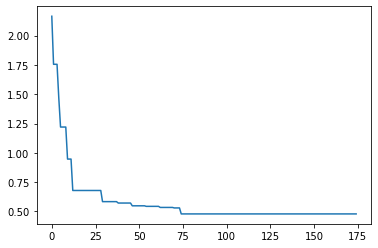

In [457]:
plt.plot(nn_model3.fitness_curve[:,0])

In [474]:
#l_rate_list = [0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
pop_list = [50,100,200,300]
ga_f_curve_list = []
ga_time_list =[]
for pop in pop_list:
    ga_nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters =50, \
                                 bias = True, is_classifier = True, \
                                 early_stopping = True, clip_max = 5, max_attempts = 10, \
                                 random_state = 3,pop_size=pop,curve=True)
     
    start_time = time.time()
    ga_nn_model.fit(X_train_adult, y_train_hot) 
    time_buff =time.time() - start_time

    ga_f_curve = ga_nn_model.fitness_curve
    ga_time_list.append(time_buff)
    ga_f_curve_list.append(ga_f_curve)

In [477]:
print(ga_f_curve)

[[2.26034852e+00 6.03000000e+02]
 [2.26034852e+00 9.04000000e+02]
 [2.26034852e+00 1.20500000e+03]
 [1.91734991e+00 1.50700000e+03]
 [1.91734991e+00 1.80800000e+03]
 [1.91734991e+00 2.10900000e+03]
 [1.91734991e+00 2.41000000e+03]
 [1.91734991e+00 2.71100000e+03]
 [1.57686081e+00 3.01300000e+03]
 [1.57686081e+00 3.31400000e+03]
 [1.57686081e+00 3.61500000e+03]
 [1.57686081e+00 3.91600000e+03]
 [1.57686081e+00 4.21700000e+03]
 [1.31407731e+00 4.51900000e+03]
 [1.31407731e+00 4.82000000e+03]
 [1.31407731e+00 5.12100000e+03]
 [1.29403120e+00 5.42300000e+03]
 [1.26438553e+00 5.72500000e+03]
 [1.26438553e+00 6.02600000e+03]
 [1.25970839e+00 6.32800000e+03]
 [1.25970839e+00 6.62900000e+03]
 [1.17878145e+00 6.93100000e+03]
 [1.17878145e+00 7.23200000e+03]
 [1.14743497e+00 7.53400000e+03]
 [8.42020027e-01 7.83600000e+03]
 [8.40842348e-01 8.13800000e+03]
 [8.40842348e-01 8.43900000e+03]
 [8.40842348e-01 8.74000000e+03]
 [8.40842348e-01 9.04100000e+03]
 [6.76001251e-01 9.34300000e+03]
 [6.760012

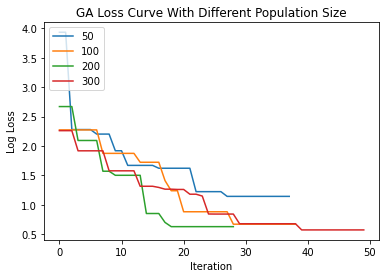

In [482]:

for i in range(len(pop_list)):
    plt.plot(ga_f_curve_list[i][:,0],label=str(pop_list[i]))
plt.legend(loc=2)

plt.title('GA Loss Curve With Different Population Size')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.savefig('Figure_14.png')

In [ ]:

for i in range(len(pop_list)):
    plt.scatter(pop_list[i],ga_time_list[i])
plt.legend(loc=2)
plt.xlabel('Population Size')
plt.ylabel('Wall Time')
plt.savefig('Figure_16.png')

In [ ]:
plt.plot(nn_model3.fitness_curve)

In [444]:
print(f1_score(y_train_hot,nn_model3.predict(X_train_adult),average='weighted'))
print(f1_score(y_test_hot,nn_model3.predict(X_test_adult),average='weighted'))

0.779691177213484
0.7791253663841665


In [ ]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(random_state=0,solver='adam',learning_rate_init=0.01,max_iter=5000,activation='relu',hidden_layer_sizes=(16),early_stopping=True,validation_fraction=0.1)
clf.fit(X_train_adult, y_train_hot)

In [ ]:
print(f1_score(y_train_hot,clf.predict(X_train_adult),average='weighted'))

In [18]:
# GD
nn_model4 = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu', \
                                 algorithm = 'gradient_descent', max_iters = 10000, \
                                 bias = True, is_classifier = True, learning_rate = 0.00001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 10, \
                                 random_state = 3,curve=True)

start_time = time.time()
fitness_curve=nn_model4.fit(X_train_adult, y_train_hot)
gd_time =time.time() - start_time

In [468]:
l_rate_list = [0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00001]
gd_f_curve_list = []
gd_time_list =[]
for rate in l_rate_list:
    gd_nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation = 'relu', \
                                 algorithm = 'gradient_descent', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = rate, \
                                 early_stopping = True, clip_max = 5, max_attempts = 1000, \
                                 random_state = 3,curve=True)

     
    start_time = time.time()
    gd_nn_model.fit(X_train_adult, y_train_hot) 
    time_buff =time.time() - start_time

    gd_f_curve = gd_nn_model.fitness_curve
    gd_time_list.append(time_buff)
    gd_f_curve_list.append(gd_f_curve)

In [390]:
nn_model4.fitness_curve

array([-1.44769321, -8.57239885, -0.69638618, -0.69304246, -0.69238364,
       -0.69145954, -0.6894579 , -0.6828582 , -0.65218678, -0.56835777,
       -0.56186765, -0.55832127, -0.56620264, -0.60327668, -0.68704936,
       -0.66507484, -0.58347859, -0.5948491 , -0.68056311, -0.65595345,
       -0.56985157, -0.58226013, -0.66900599, -0.62524514, -0.51933048,
       -0.52328711, -0.55152309, -0.56331329, -0.64941052, -0.57296676,
       -0.52109219, -0.55833317, -0.52440431, -0.57325225, -0.50744984,
       -0.526966  , -0.53741166, -0.60951119, -0.50658287, -0.52022879,
       -0.57257452, -0.49298229, -0.49366091, -0.50407873, -0.54164902,
       -0.4944884 , -0.53152124, -0.4952745 , -0.55514421, -0.48087019,
       -0.48825915, -0.50567089, -0.58416692, -0.47127076, -0.47359958,
       -0.50313422, -0.5118021 , -0.61169248, -0.50278834, -0.52022945,
       -0.60112829, -0.49534007, -0.5103576 , -0.57819917, -0.4758872 ,
       -0.48413662, -0.51592499, -0.47786538, -0.5133742 , -0.47

In [391]:
print(f1_score(y_train_hot,nn_model4.predict(X_train_adult),average='weighted'))
print(f1_score(y_test_hot,nn_model4.predict(X_test_adult),average='weighted'))


0.8210034879189554
0.8190274995774889


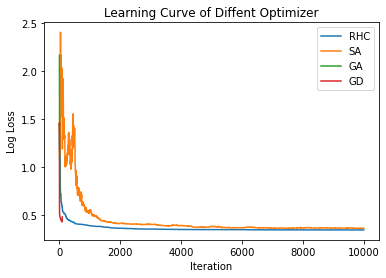

In [17]:
####learning curve

fit_1 = nn_model1.fitness_curve
fit_2 = nn_model2.fitness_curve
fit_3 = nn_model3.fitness_curve
fit_4 = nn_model4.fitness_curve

plt.plot(fit_1[:,0],label='RHC')
plt.plot(fit_2[:,0],label='SA')
plt.plot(fit_3[:,0],label='GA')
plt.plot(-fit_4,label='GD')
#,5000)
plt.legend()
plt.title('Learning Curve of Diffent Optimizer')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.savefig('Figure_17.png')


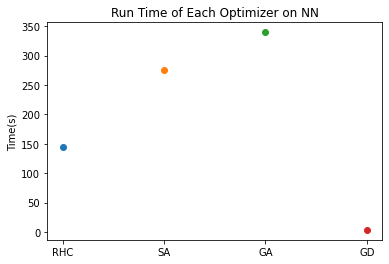

In [28]:
plt.scatter(0,RHC_time)
plt.scatter(1,SA_time)
plt.scatter(2,GA_time)
plt.scatter(3,gd_time)
plt.xticks([0,1,2,3],['RHC','SA','GA','GD'])
plt.title('Run Time of Each Optimizer on NN')
plt.ylabel('Time(s)')
plt.savefig('Figure_18.png')

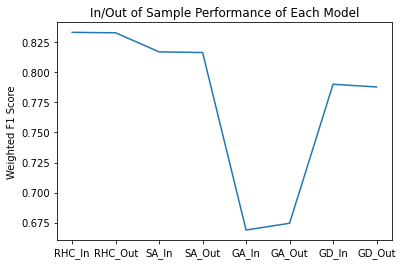

In [32]:
score = [f1_score(y_train_hot,nn_model1.predict(X_train_adult),average='weighted'),f1_score(y_test_hot,nn_model1.predict(X_test_adult),average='weighted'),f1_score(y_train_hot,nn_model2.predict(X_train_adult),average='weighted'),f1_score(y_test_hot,nn_model2.predict(X_test_adult),average='weighted'),f1_score(y_train_hot,nn_model3.predict(X_train_adult),average='weighted'),f1_score(y_test_hot,nn_model3.predict(X_test_adult),average='weighted'),f1_score(y_train_hot,nn_model4.predict(X_train_adult),average='weighted'),f1_score(y_test_hot,nn_model4.predict(X_test_adult),average='weighted')]
score_label = ['RHC_In','RHC_Out','SA_In','SA_Out','GA_In','GA_Out','GD_In','GD_Out']
plt.plot([0,1,2,3,4,5,6,7],score)
plt.xticks([0,1,2,3,4,5,6,7],score_label)
plt.title('In/Out of Sample Performance of Each Model')
plt.ylabel('Weighted F1 Score')
plt.savefig('Figure_19.png')